## Langkah 1: Import Library yang Diperlukan

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, ConfusionMatrixDisplay

# Mengatur tampilan grafik agar terlihat lebih jelas
%matplotlib inline

# Library untuk analisis dan visualisasi data
# Scikit-learn digunakan untuk membuat model dan evaluasi performa

## Langkah 2: Memuat Dataset

In [2]:
# Memuat dataset
file_path = "/content/MaterialStrength.csv"
material_data = pd.read_csv(file_path)  # Membaca dataset dari file CSV

# Menampilkan beberapa baris pertama untuk melihat struktur data
material_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30


## Langkah 3: Membersihkan dan Menormalkan Data

In [3]:
# Menstandardisasi kolom kategorikal agar konsisten dalam penulisan huruf kapital
material_data['x14'] = material_data['x14'].str.upper()
material_data['x15'] = material_data['x15'].str.upper()

# Menampilkan informasi dataset untuk memastikan tidak ada nilai NaN dan memastikan tipe data sudah sesuai
material_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


## Langkah 4: Mengonversi Kolom Kategorikal menjadi Numerik

In [4]:
# Mengubah kolom kategorikal 'x14' dan 'x15' menjadi numerik menggunakan LabelEncoder
label_encoders = {}
for column in ['x14', 'x15']:
    le = LabelEncoder()
    material_data[column] = le.fit_transform(material_data[column])
    label_encoders[column] = le  # Menyimpan encoder untuk referensi

# Setelah encoding, menampilkan beberapa baris untuk memastikan kolom sudah dalam bentuk numerik
material_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,1,0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,1,1,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,1,0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,1,1,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,1,0,44.30


## Langkah 5: Memisahkan Fitur dan Target

In [5]:
# Memisahkan fitur dan target
X = material_data.drop(columns=['target_feature'])  # Semua kolom kecuali 'target_feature' sebagai fitur
y = material_data['target_feature']  # Kolom target adalah 'target_feature'

## Langkah 6: Membagi Dataset menjadi Data Latih dan Uji

In [6]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Menggunakan random_state untuk memastikan hasil konsisten

## Langkah 7: Inisialisasi Model Decision Tree dan KNN

In [7]:
# Menginisialisasi model Decision Tree dan KNN
dt_regressor = DecisionTreeRegressor(random_state=42)  # Decision Tree dengan random_state untuk hasil konsisten
knn_regressor = KNeighborsRegressor()  # KNN dengan parameter default

## Langkah 8: Melatih Model dengan Data Latih

In [8]:
# Melatih model Decision Tree dan KNN menggunakan data latih
dt_regressor.fit(X_train, y_train)  # Melatih model Decision Tree
knn_regressor.fit(X_train, y_train)  # Melatih model KNN

KNeighborsRegressor()

## Langkah 9: Membuat Prediksi pada Data Uji

In [9]:
# Membuat prediksi untuk data uji dengan kedua model
y_pred_dt = dt_regressor.predict(X_test)  # Prediksi dengan model Decision Tree
y_pred_knn = knn_regressor.predict(X_test)  # Prediksi dengan model KNN

## Langkah 10: Mengevaluasi Model dengan Metrik Regresi

In [10]:
# Menghitung MAE, MSE, RMSE, dan R² untuk model Decision Tree
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

# Menghitung MAE, MSE, RMSE, dan R² untuk model KNN
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, y_pred_knn)

# Menyimpan hasil evaluasi dalam DataFrame agar mudah dibaca
results = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R²"],
    "Decision Tree": [dt_mae, dt_mse, dt_rmse, dt_r2],
    "KNN": [knn_mae, knn_mse, knn_rmse, knn_r2]
})

# Menampilkan hasil evaluasi
results

,Metric,Decision Tree,KNN
0,MAE,2.221893,6.652767
1,MSE,19.665754,72.540378
2,RMSE,4.434609,8.517064
3,R²,0.923681,0.718483


## Langkah 11: Visualisasi Perbandingan Nilai Aktual dan Prediksi

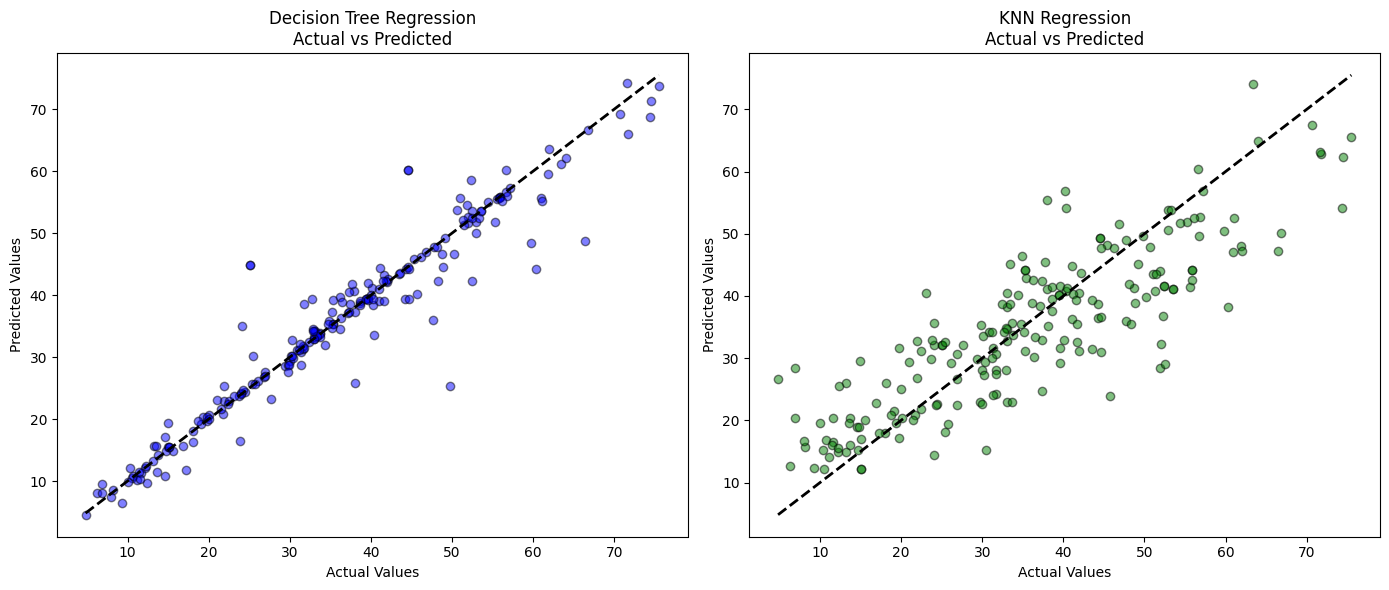

In [11]:
# Membuat plot perbandingan antara nilai aktual dan nilai prediksi untuk kedua model

# Plot untuk Decision Tree
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.5, color="blue", edgecolor="k")  # Plot scatter untuk Decision Tree
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Garis diagonal referensi
plt.xlabel("Actual Values")  # Label sumbu x
plt.ylabel("Predicted Values")  # Label sumbu y
plt.title("Decision Tree Regression\nActual vs Predicted")  # Judul plot

# Plot untuk KNN
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.5, color="green", edgecolor="k")  # Plot scatter untuk KNN
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Garis diagonal referensi
plt.xlabel("Actual Values")  # Label sumbu x
plt.ylabel("Predicted Values")  # Label sumbu y
plt.title("KNN Regression\nActual vs Predicted")  # Judul plot

plt.tight_layout()  # Mengatur layout agar kedua plot tidak tumpang tindih
plt.show()  # Menampilkan plot